# Project Milestone 5

Merging the Data and Storing in a Database/Visualizing Data¶
Problem Statement :
Now that you have cleaned and transformed your 3 datasets, you need to load them into a database. You can choose what kind of database (SQLLite or MySQL, Postgre SQL are all free options). You will want to load each dataset into SQL Lite as an individual table and then you must join the datasets together in Python into 1 dataset.

Once all the data is merged together in your database, create 5 visualizations that demonstrate the data you have cleansed. You should have at least 2 visualizations that have data from more than one source (meaning, if you have 3 tables, you must have visualizations that span across 2 of the tables – you are also welcome to use your consolidated dataset that you created in the previous step, if you do that, you have met this requirement).

For the visualization portion of the project, you are welcome to use a python library like Matplotlib, Seaborn, or an R package ggPlot2, Plotly, or Tableau/PowerBI.

PowerBI is a free tool that could be used – Tableau only has a free web author. If your use Tableau/PowerBI you need to submit a PDF with your assignment vs the Tableau/PowerBI file. /p>

Submit your code for merging and storing in the database, with your code for the visualizations along with a 250-500-word summary of what you learned and had to do to complete the project. You can submit a Jupyter Notebook or a PDF of your code. If you submit a .py file you need to also include a PDF or attachment of your results.

Remember – your GitHub repository can act as a portfolio for potential employers! I would highly suggest using this to submit your work, so you can fill it with good content that demonstrates the projects you are working on!

### Solution :
Solution starts below

In [37]:
# Import the sqlite3 library. This will help in query to db and do a SQL operations very easily.
import sqlite3
# Load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [38]:
df = {'StateShortName':["AL","AK","AS","AZ","AR","CA","CO","CT","DE","DC","FL","GA","GU","HI","ID","IL","IN","IA","KS","KY","LA","ME","MD","MA","MI","MN","MS","MO","MT","NE","NV","NH","NJ","NM","NY","NC","ND","MP","OH","OK","OR","PA","PR","RI","SC","SD","TN","TX","USVI","UT","VT","VA","WA","WV","WI","WY"]}
StateShortdf = pd.DataFrame(data=df)

In [39]:
# Make a sqlite connection to petsdb. This is file which stores the person information
con = sqlite3.connect("./data/covid19.db")

In [40]:
# Load the CSV file
covid19_df = pd.read_csv ('./data/milestone1Data.csv')
covid19Web_df = pd.read_csv ('./data/milestone2Data.csv')
temperature_df = pd.read_csv ('./data/milestone3temperature.csv')
humidity_df = pd.read_csv ('./data/milestone3humidity.csv')
pressure_df = pd.read_csv ('./data/milestone3pressure.csv')

In [41]:
covid19_df.to_sql('COVID19', con=con, if_exists='replace', index=False)
covid19Web_df.to_sql('COVID19_WEB', con=con, if_exists='replace', index=False)
temperature_df.to_sql('TEMPERATURE', con=con, if_exists='replace', index=False)
humidity_df.to_sql('HUMIDITY', con=con, if_exists='replace', index=False)
pressure_df.to_sql('PRESSURE', con=con, if_exists='replace', index=False)

In [42]:
# Checking all the tables in the db
cursor = con.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cursor.fetchall())
# Five Tables Added

[('COVID19',), ('COVID19_WEB',), ('TEMPERATURE',), ('HUMIDITY',), ('PRESSURE',)]


In [43]:
con.execute("SELECT count('*') FROM COVID19").fetchall()

[(7817,)]

In [44]:
# Checking table structure and data types
cursor.execute("PRAGMA table_info([COVID19])")
print(cursor.fetchall())

[(0, 'submission_date', 'TEXT', 0, None, 0), (1, 'state', 'TEXT', 0, None, 0), (2, 'total_cases', 'INTEGER', 0, None, 0), (3, 'confirmed_cases', 'REAL', 0, None, 0), (4, 'probable_cases', 'REAL', 0, None, 0), (5, 'new_case', 'INTEGER', 0, None, 0), (6, 'pnew_case', 'REAL', 0, None, 0), (7, 'total_death', 'INTEGER', 0, None, 0), (8, 'confirmed_death', 'REAL', 0, None, 0), (9, 'probable_death', 'REAL', 0, None, 0), (10, 'new_death', 'INTEGER', 0, None, 0), (11, 'probable_new_death', 'REAL', 0, None, 0), (12, 'created_at', 'TEXT', 0, None, 0), (13, 'consent_cases', 'TEXT', 0, None, 0), (14, 'consent_deaths', 'TEXT', 0, None, 0)]


In [45]:
cursor.execute("PRAGMA table_info([COVID19_WEB])")
print(cursor.fetchall())

[(0, 'State', 'TEXT', 0, None, 0), (1, 'StateShortName', 'TEXT', 0, None, 0), (2, 'Cases', 'INTEGER', 0, None, 0), (3, 'Deaths', 'TEXT', 0, None, 0), (4, 'Recovered', 'TEXT', 0, None, 0), (5, 'Hospitalized', 'TEXT', 0, None, 0), (6, 'Updated_date', 'TEXT', 0, None, 0)]


In [46]:
cursor.execute("PRAGMA table_info([TEMPERATURE])")
print(cursor.fetchall())

[(0, 'Date', 'TEXT', 0, None, 0), (1, 'AL', 'REAL', 0, None, 0), (2, 'AK', 'REAL', 0, None, 0), (3, 'AZ', 'REAL', 0, None, 0), (4, 'AR', 'REAL', 0, None, 0), (5, 'CA', 'REAL', 0, None, 0), (6, 'CO', 'REAL', 0, None, 0), (7, 'CT', 'REAL', 0, None, 0), (8, 'DE', 'REAL', 0, None, 0), (9, 'DC', 'REAL', 0, None, 0), (10, 'FL', 'REAL', 0, None, 0), (11, 'GA', 'REAL', 0, None, 0), (12, 'HI', 'REAL', 0, None, 0), (13, 'ID', 'REAL', 0, None, 0), (14, 'IL', 'REAL', 0, None, 0), (15, 'IN', 'REAL', 0, None, 0), (16, 'IA', 'REAL', 0, None, 0), (17, 'KS', 'REAL', 0, None, 0), (18, 'KY', 'REAL', 0, None, 0), (19, 'LA', 'REAL', 0, None, 0), (20, 'ME', 'REAL', 0, None, 0), (21, 'MD', 'REAL', 0, None, 0), (22, 'MA', 'REAL', 0, None, 0), (23, 'MI', 'REAL', 0, None, 0), (24, 'MN', 'REAL', 0, None, 0), (25, 'MS', 'REAL', 0, None, 0), (26, 'MO', 'REAL', 0, None, 0), (27, 'MT', 'REAL', 0, None, 0), (28, 'NE', 'REAL', 0, None, 0), (29, 'NV', 'REAL', 0, None, 0), (30, 'NH', 'REAL', 0, None, 0), (31, 'NJ', 'REA

In [47]:
cursor.execute("PRAGMA table_info([HUMIDITY])")
print(cursor.fetchall())

[(0, 'datetime', 'TEXT', 0, None, 0), (1, 'AL', 'REAL', 0, None, 0), (2, 'AK', 'REAL', 0, None, 0), (3, 'AZ', 'REAL', 0, None, 0), (4, 'AR', 'REAL', 0, None, 0), (5, 'CA', 'REAL', 0, None, 0), (6, 'CO', 'REAL', 0, None, 0), (7, 'CT', 'REAL', 0, None, 0), (8, 'DE', 'REAL', 0, None, 0), (9, 'DC', 'REAL', 0, None, 0), (10, 'FL', 'REAL', 0, None, 0), (11, 'GA', 'REAL', 0, None, 0), (12, 'HI', 'REAL', 0, None, 0), (13, 'ID', 'REAL', 0, None, 0), (14, 'IL', 'REAL', 0, None, 0), (15, 'IN', 'REAL', 0, None, 0), (16, 'IA', 'REAL', 0, None, 0), (17, 'KS', 'REAL', 0, None, 0), (18, 'KY', 'REAL', 0, None, 0), (19, 'LA', 'REAL', 0, None, 0), (20, 'ME', 'REAL', 0, None, 0), (21, 'MD', 'REAL', 0, None, 0), (22, 'MA', 'REAL', 0, None, 0), (23, 'MI', 'REAL', 0, None, 0), (24, 'MN', 'REAL', 0, None, 0), (25, 'MS', 'REAL', 0, None, 0), (26, 'MO', 'REAL', 0, None, 0), (27, 'MT', 'REAL', 0, None, 0), (28, 'NE', 'REAL', 0, None, 0), (29, 'NV', 'REAL', 0, None, 0), (30, 'NH', 'REAL', 0, None, 0), (31, 'NJ', 

In [48]:
cursor.execute("PRAGMA table_info([PRESSURE])")
print(cursor.fetchall())

[(0, 'datetime', 'TEXT', 0, None, 0), (1, 'AL', 'REAL', 0, None, 0), (2, 'AK', 'REAL', 0, None, 0), (3, 'AZ', 'REAL', 0, None, 0), (4, 'AR', 'REAL', 0, None, 0), (5, 'CA', 'REAL', 0, None, 0), (6, 'CO', 'REAL', 0, None, 0), (7, 'CT', 'REAL', 0, None, 0), (8, 'DE', 'REAL', 0, None, 0), (9, 'DC', 'REAL', 0, None, 0), (10, 'FL', 'REAL', 0, None, 0), (11, 'GA', 'REAL', 0, None, 0), (12, 'HI', 'REAL', 0, None, 0), (13, 'ID', 'REAL', 0, None, 0), (14, 'IL', 'REAL', 0, None, 0), (15, 'IN', 'REAL', 0, None, 0), (16, 'IA', 'REAL', 0, None, 0), (17, 'KS', 'REAL', 0, None, 0), (18, 'KY', 'REAL', 0, None, 0), (19, 'LA', 'REAL', 0, None, 0), (20, 'ME', 'REAL', 0, None, 0), (21, 'MD', 'REAL', 0, None, 0), (22, 'MA', 'REAL', 0, None, 0), (23, 'MI', 'REAL', 0, None, 0), (24, 'MN', 'REAL', 0, None, 0), (25, 'MS', 'REAL', 0, None, 0), (26, 'MO', 'REAL', 0, None, 0), (27, 'MT', 'REAL', 0, None, 0), (28, 'NE', 'REAL', 0, None, 0), (29, 'NV', 'REAL', 0, None, 0), (30, 'NH', 'REAL', 0, None, 0), (31, 'NJ', 

In [49]:
# API Data
df_api_sql_1 = pd.read_sql_query('''SELECT * from COVID19 limit 5''', con)
df_api_sql_1

,submission_date,state,total_cases,confirmed_cases,probable_cases,new_case,pnew_case,total_death,confirmed_death,probable_death,new_death,probable_new_death,created_at,consent_cases,consent_deaths
0,2020-05-04,KY,5245,5245.0,0.0,115,0.0,261,261.0,0.0,8,0.0,05/05/2020 05:25:08 PM,Agree,Agree
1,2020-12-08,OK,205999,171497.0,34502.0,0,0.0,1752,1680.0,72.0,0,0.0,12/09/2020 02:45:40 PM,Agree,Agree
2,2020-05-05,GA,28196,28182.0,14.0,602,1.0,1258,1258.0,0.0,47,0.0,05/06/2020 12:23:08 PM,Agree,Agree
3,2020-08-14,MS,70930,69268.0,1662.0,944,106.0,2043,1965.0,78.0,32,9.0,08/15/2020 02:02:05 PM,Agree,Agree
4,2020-12-10,WY,38223,33203.0,5020.0,338,24.0,299,299.0,0.0,0,0.0,12/11/2020 03:06:51 PM,Agree,Agree


In [50]:
# API Data
df_api_sql_2 = pd.read_sql_query('''SELECT * from COVID19_WEB limit 5''', con)
df_api_sql_2

,State,StateShortName,Cases,Deaths,Recovered,Hospitalized,Updated_date
0,Alabama,AL,488973,9660,275245,45250,2021-01-13
1,Alaska,AK,55560,290,7165,1260,2021-01-13
2,American Samoa,AS,3,0,–,–,2021-01-13
3,Arizona,AZ,810658,15650,–,57072,2021-01-13
4,Arkansas,AR,316593,5377,306382,14617,2021-01-13


In [51]:
# Getting required data through joins
df_web_sql_3 = pd.read_sql_query('''SELECT * from COVID19 A JOIN COVID19_WEB B WHERE 
                               A."state" = B."StateShortName" and B."StateShortName" = "IL" order by A.submission_date DESC''', con)
df_web_sql_3

,submission_date,state,total_cases,confirmed_cases,probable_cases,new_case,pnew_case,total_death,confirmed_death,probable_death,...,created_at,consent_cases,consent_deaths,State,StateShortName,Cases,Deaths,Recovered,Hospitalized,Updated_date
0,2021-01-10,IL,1028750,1028750.0,0.0,4711,0.0,19293,17574.0,1719.0,...,01/11/2021 03:01:02 PM,Agree,Agree,Illinois,IL,1189416,22803,–,–,2021-01-13
1,2021-01-09,IL,1024039,1024039.0,0.0,6717,0.0,19210,17494.0,1716.0,...,01/10/2021 04:10:55 PM,Agree,Agree,Illinois,IL,1189416,22803,–,–,2021-01-13
2,2021-01-08,IL,1017322,1017322.0,0.0,9277,0.0,19108,17395.0,1713.0,...,01/09/2021 03:26:08 PM,Agree,Agree,Illinois,IL,1189416,22803,–,–,2021-01-13
3,2021-01-07,IL,1008045,1008045.0,0.0,8757,0.0,18941,17272.0,1669.0,...,01/08/2021 03:56:01 PM,Agree,Agree,Illinois,IL,1189416,22803,–,–,2021-01-13
4,2021-01-06,IL,999288,999288.0,0.0,7569,0.0,18735,17096.0,1639.0,...,01/07/2021 02:56:59 PM,Agree,Agree,Illinois,IL,1189416,22803,–,–,2021-01-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,2020-04-23,IL,36934,36934.0,0.0,1826,0.0,1688,1688.0,0.0,...,05/25/2020 03:38:40 PM,Agree,Agree,Illinois,IL,1189416,22803,–,–,2021-01-13
263,2020-04-22,IL,35108,35108.0,0.0,2049,0.0,1565,1565.0,0.0,...,04/22/2020 04:22:39 PM,Agree,Agree,Illinois,IL,1189416,22803,–,–,2021-01-13
264,2020-04-21,IL,33059,33059.0,0.0,1551,0.0,1468,1468.0,0.0,...,04/21/2020 04:22:39 PM,Agree,Agree,Illinois,IL,1189416,22803,–,–,2021-01-13
265,2020-04-20,IL,31508,31508.0,0.0,1151,0.0,1349,1349.0,0.0,...,04/20/2020 04:22:39 PM,Agree,Agree,Illinois,IL,1189416,22803,–,–,2021-01-13


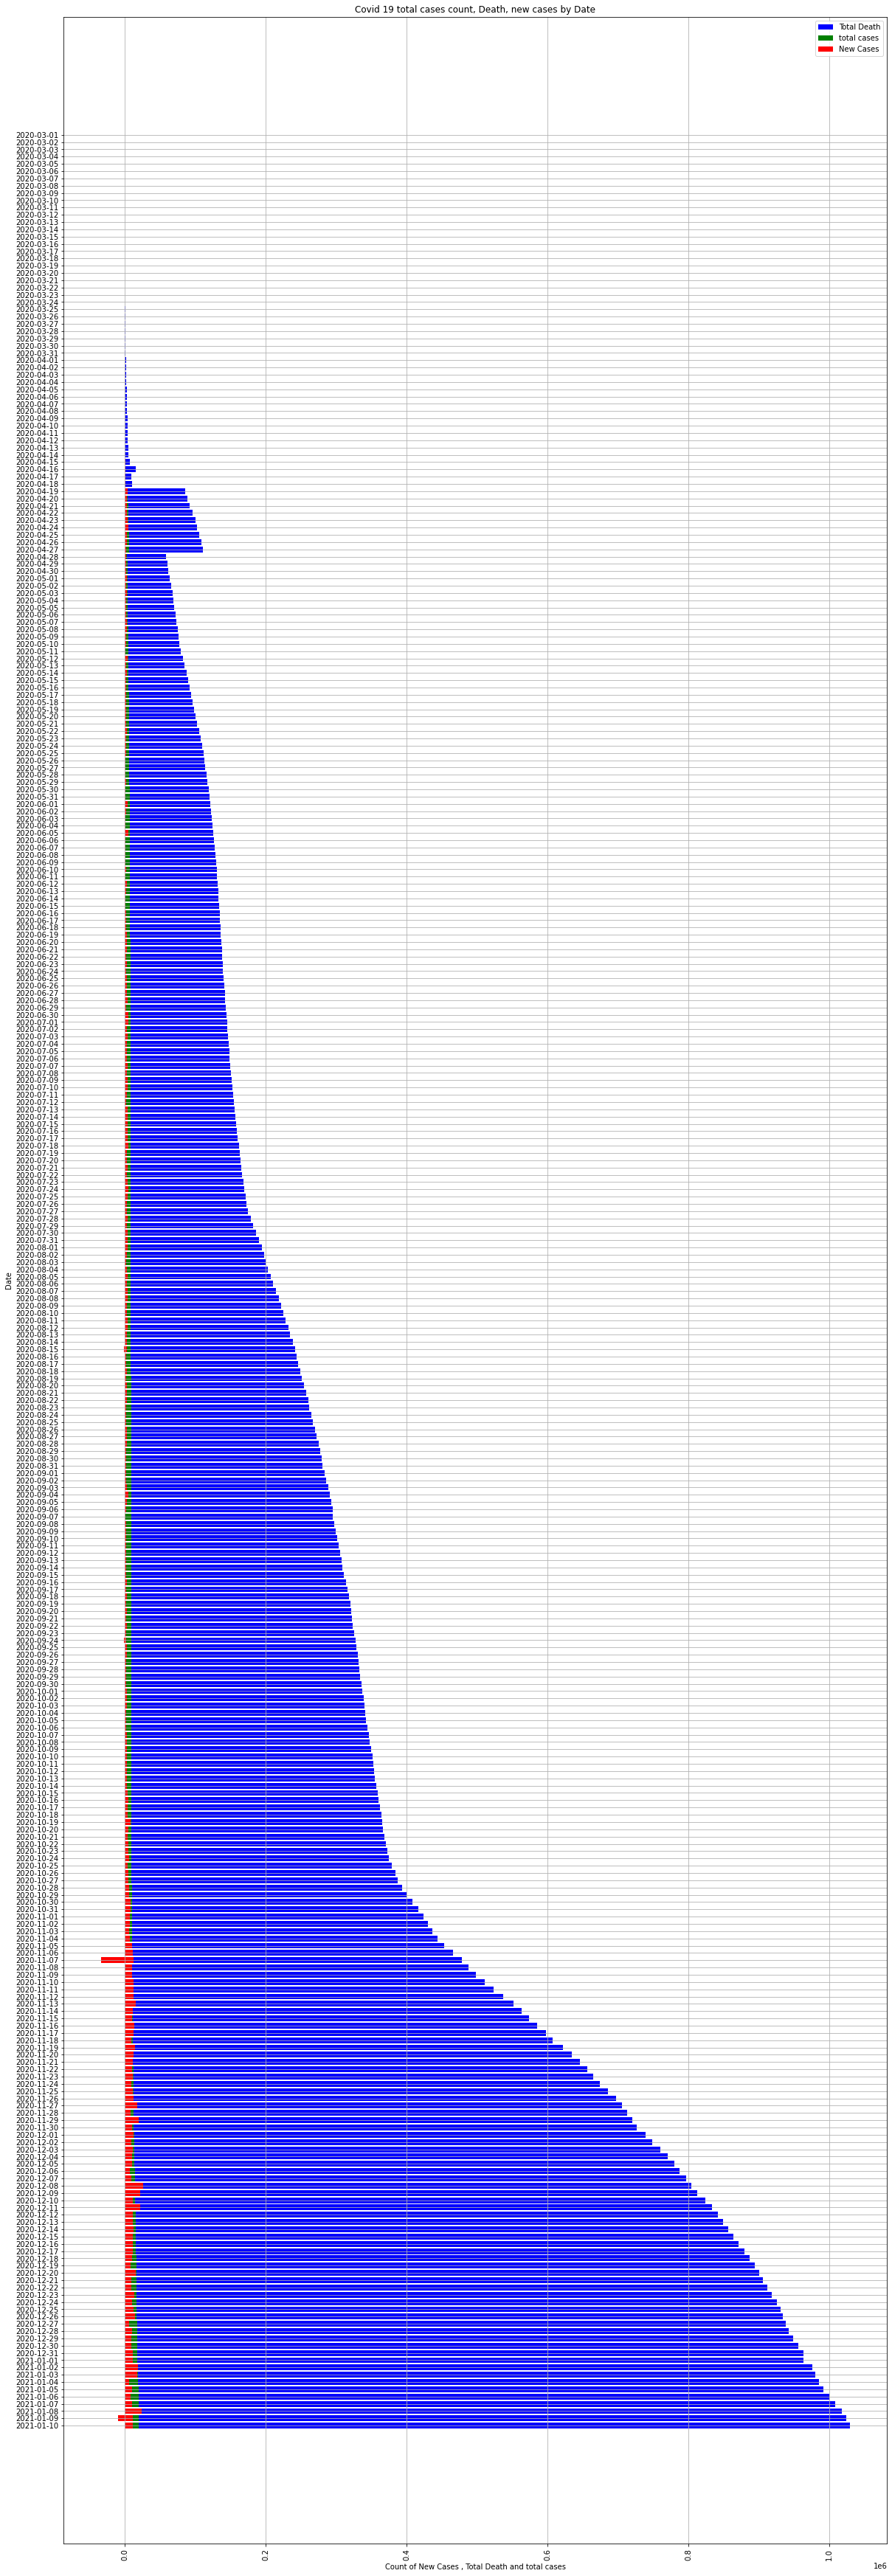

In [145]:
# Plot 1
# Creating Bar Chart for Covid 19 total cases count, Death, new cases by Date
# Bar Chart/Plot
plt.figure(figsize=(20,63))
plt.barh(df_web_sql_3['submission_date'],df_web_sql_3['total_cases'], color='b', align='center')
plt.barh(df_web_sql_3['submission_date'],df_web_sql_3['total_death'], color='g', align='center')
plt.barh(df_web_sql_3['submission_date'],df_web_sql_3['new_case'],  color='r', align='center')

# plt.barh(df_web_sql_3['submission_date'],df_web_sql_3['total_cases']);
#plt.grid(True)
plt.title("Covid 19 total cases count, Death, new cases by Date")
plt.ylabel("Date")
plt.xlabel("Count of New Cases , Total Death and total cases")
plt.xticks(rotation='vertical')
plt.grid()
plt.legend(labels = ["Total Death" ,"total cases","New Cases"])
plt.savefig("BarChartOfIllinois.pdf")
plt.show()

In [53]:
# Find the high count states of COVID19 cases
# Displaying then by date
df_web_sql = pd.read_sql_query('''SELECT B."StateShortName" , A."total_cases" from COVID19 A JOIN COVID19_WEB B WHERE 
                               A."state" = B."StateShortName" order by A.submission_date ASC''', con)
df_web_sql

,StateShortName,total_cases
0,NC,0
1,NC,1
2,NC,1
3,NC,1
4,NC,1
...,...,...
7009,TN,653869
7010,OH,777065
7011,DE,65273
7012,OR,125683


In [54]:
# df_web_sql[]
df_web_sql[df_web_sql["StateShortName"] == "IL"]["total_cases"]

79        30357
96        31508
113       33059
145       35108
169       36934
         ...   
6895     999288
6931    1008045
6946    1017322
6964    1024039
6988    1028750
Name: total_cases, Length: 267, dtype: int64

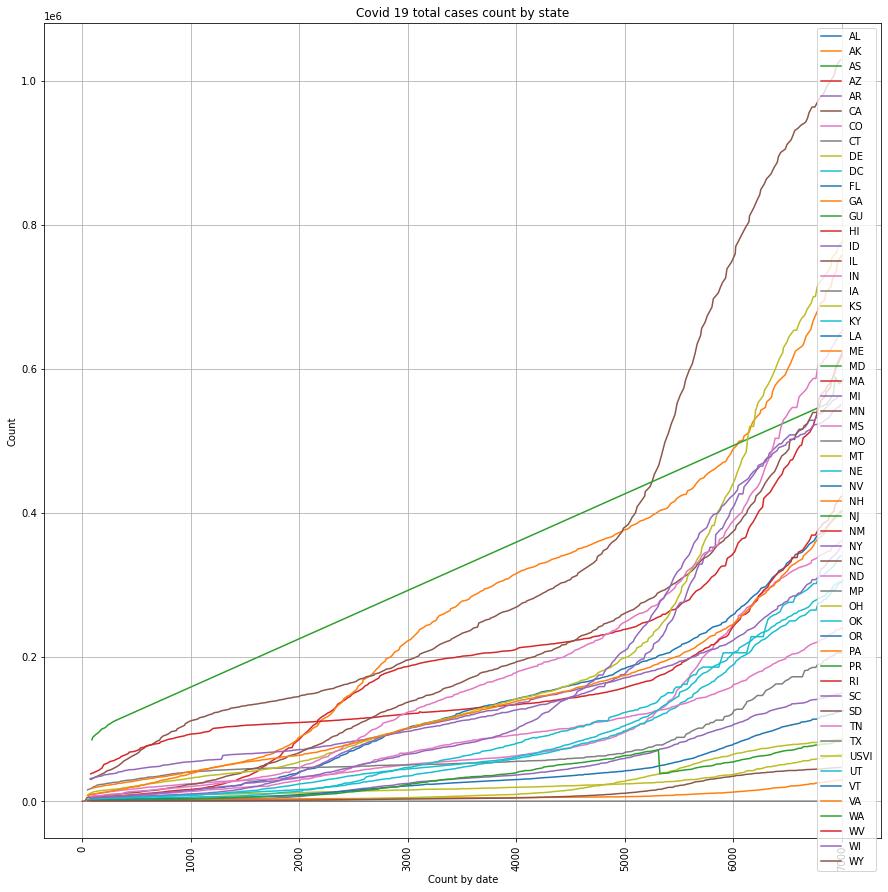

In [55]:
# Plot 2
# Creating line Chart for Covid 19 total cases count by state
# Bar Chart/Plot
plt.figure(figsize=(15,15))
for st in StateShortdf["StateShortName"]: 
#     print(st)
    plt.plot(df_web_sql[df_web_sql["StateShortName"] == st]["total_cases"])
    
#plt.grid(True)
plt.title("Covid 19 total cases count by state")
plt.ylabel("Count")
plt.xlabel("Count by date")
plt.xticks(rotation='vertical')
plt.grid()
plt.legend(labels = StateShortdf["StateShortName"])
plt.savefig("lineChart.pdf")
plt.show()

In [56]:
# API Data
df_weather_sql_sample = pd.read_sql_query('''SELECT * from TEMPERATURE limit 5''', con)
df_weather_sql_sample

,Date,AL,AK,AZ,AR,CA,CO,CT,DE,DC,...,SD,TN,TX,UT,VT,VA,WA,WV,WI,WY
0,2020-09-29,284.63,282.08,289.48,281.80,291.87,291.53,293.41,296.60,285.12,...,288.27,289.98,286.87,286.18,284.01,287.41,283.85,294.03,289.98,286.87
1,2020-09-29,277.34,276.27,285.18,276.21,284.70,283.17,275.96,283.68,270.41,...,280.35,268.93,263.41,271.22,274.68,276.66,272.75,279.19,268.93,263.41
2,2020-09-29,276.65,275.45,284.87,275.79,283.76,282.48,275.31,283.09,266.34,...,279.40,269.04,262.59,271.15,274.46,275.92,272.75,279.08,269.04,262.59
3,2020-09-29,276.69,274.94,284.47,275.38,282.90,282.02,274.40,282.91,265.74,...,278.45,269.02,262.15,270.78,274.29,275.71,272.46,278.77,269.02,262.15
4,2020-09-29,276.33,275.06,284.37,274.74,282.63,281.12,274.35,282.03,264.44,...,277.75,269.16,261.72,270.53,273.97,274.95,272.22,278.06,269.16,261.72


In [57]:
# Find the high count states of COVID19 cases
# Displaying then by date
df_weather_sql = pd.read_sql_query('''SELECT * from TEMPERATURE A order by A.Date ASC''', con)
df_weather_sql

,Date,AL,AK,AZ,AR,CA,CO,CT,DE,DC,...,SD,TN,TX,UT,VT,VA,WA,WV,WI,WY
0,2020-09-29,284.63,282.08,289.48,281.80,291.87,291.53,293.41,296.60,285.12,...,288.27,289.98,286.87,286.18,284.01,287.41,283.850,294.03,289.98,286.87
1,2020-09-29,277.34,276.27,285.18,276.21,284.70,283.17,275.96,283.68,270.41,...,280.35,268.93,263.41,271.22,274.68,276.66,272.750,279.19,268.93,263.41
2,2020-09-29,276.65,275.45,284.87,275.79,283.76,282.48,275.31,283.09,266.34,...,279.40,269.04,262.59,271.15,274.46,275.92,272.750,279.08,269.04,262.59
3,2020-09-29,276.69,274.94,284.47,275.38,282.90,282.02,274.40,282.91,265.74,...,278.45,269.02,262.15,270.78,274.29,275.71,272.460,278.77,269.02,262.15
4,2020-09-29,276.33,275.06,284.37,274.74,282.63,281.12,274.35,282.03,264.44,...,277.75,269.16,261.72,270.53,273.97,274.95,272.220,278.06,269.16,261.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44574,2025-11-27,288.01,282.89,302.07,281.65,295.68,292.74,290.61,295.59,286.45,...,293.02,284.94,274.59,288.23,280.69,286.15,283.800,284.21,284.94,274.59
44575,2025-11-27,288.01,283.39,302.07,282.75,295.96,292.58,291.34,296.25,286.44,...,293.02,284.94,274.59,288.23,280.69,286.15,283.800,284.21,284.94,274.59
44576,2025-11-27,288.01,283.02,302.07,282.96,295.65,292.61,292.15,297.15,286.14,...,293.02,284.94,274.59,288.23,280.69,286.15,283.800,284.21,284.94,274.59
44577,2025-11-27,288.01,282.28,302.07,283.04,294.93,291.40,291.64,297.15,284.70,...,293.02,284.94,274.59,288.23,280.69,286.15,283.800,284.21,284.94,274.59


In [58]:
# # Getting required data through joins
# df_web_sql_4 = pd.read_sql_query('''SELECT * from COVID19 A JOIN TEMPERATURE B WHERE 
#                                A."submission_date" = B."Date"''', con)
# df_web_sql_4

In [116]:
# df_weather_sql[df_weather_sql["Date"] == "2020-09-29"]["AL"][0]
df_weather_sql[df_weather_sql["Date"] == "2021-01-10"]["AL"].iloc[0]

289.1

In [81]:
# Getting required data through joins
df_web_sql_3 = pd.read_sql_query('''SELECT * from COVID19 A JOIN COVID19_WEB B WHERE 
                               A."state" = B."StateShortName" order by A.submission_date DESC''', con)
df_web_sql_3

,submission_date,state,total_cases,confirmed_cases,probable_cases,new_case,pnew_case,total_death,confirmed_death,probable_death,...,created_at,consent_cases,consent_deaths,State,StateShortName,Cases,Deaths,Recovered,Hospitalized,Updated_date
0,2021-01-10,WI,550260,506890.0,43370.0,2126,294.0,5570,5157.0,413.0,...,01/11/2021 03:01:02 PM,Agree,Agree,Wisconsin,WI,613419,6910,545562,25838,2021-01-13
1,2021-01-10,IL,1028750,1028750.0,0.0,4711,0.0,19293,17574.0,1719.0,...,01/11/2021 03:01:02 PM,Agree,Agree,Illinois,IL,1189416,22803,–,–,2021-01-13
2,2021-01-10,ID,149667,123077.0,26590.0,432,91.0,1534,1355.0,179.0,...,01/11/2021 03:01:02 PM,Agree,Agree,Idaho,ID,169584,1826,92573,7007,2021-01-13
3,2021-01-10,WY,46832,40013.0,6819.0,113,25.0,489,489.0,0.0,...,01/11/2021 03:01:02 PM,Agree,Agree,Wyoming,WY,53944,671,52688,1373,2021-01-13
4,2021-01-10,OK,340732,270526.0,70206.0,3867,1297.0,2784,2576.0,208.0,...,01/11/2021 03:01:02 PM,Agree,Agree,Oklahoma,OK,420212,4227,401945,23700,2021-01-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7009,2020-03-05,NC,1,1.0,0.0,0,0.0,0,0.0,0.0,...,11/13/2020 07:10:12 PM,Agree,Agree,North Carolina,NC,846284,10965,795521,–,2021-01-13
7010,2020-03-04,NC,1,1.0,0.0,0,0.0,0,0.0,0.0,...,11/13/2020 07:10:12 PM,Agree,Agree,North Carolina,NC,846284,10965,795521,–,2021-01-13
7011,2020-03-03,NC,1,1.0,0.0,0,0.0,0,0.0,0.0,...,11/13/2020 07:10:12 PM,Agree,Agree,North Carolina,NC,846284,10965,795521,–,2021-01-13
7012,2020-03-02,NC,1,1.0,0.0,1,0.0,0,0.0,0.0,...,11/13/2020 07:10:12 PM,Agree,Agree,North Carolina,NC,846284,10965,795521,–,2021-01-13


In [125]:
# This is step to Stitching all datasets
#for column in df_web_sql_3:
index = 0 
# df = {'temperature':[]}
temperatureColumn = pd.DataFrame(columns = ["temperature"])
print ( temperatureColumn)
for row in df_web_sql_3["submission_date"]:
#     print(row)
#     print(df_web_sql_3["state"][index])
#     print(df_weather_sql.filter(df_weather_sql.Date = row))
    try:
        if df_web_sql_3["state"][index] != "PR":
#             print(df_weather_sql[df_weather_sql["Date"] == row][df_web_sql_3["state"][index]].iloc[0])
            temperatureColumn = temperatureColumn.append({"temperature" : df_weather_sql[df_weather_sql["Date"] == row][df_web_sql_3["state"][index]].iloc[0]},ignore_index=True,sort=False)
        else:
            temperatureColumn = temperatureColumn.append({"temperature" : np.nan},ignore_index=True,sort=False)
    except:
#         print("No data found")
        temperatureColumn = temperatureColumn.append({"temperature" : np.nan},ignore_index=True,sort=False)
#         temperatureColumn.append(0.0,ignore_index=True)
    index = index + 1



Empty DataFrame
Columns: [temperature]
Index: []


In [126]:
temperatureColumn

,temperature
0,286.12
1,286.12
2,303.43
3,281.91
4,307.48
...,...
7009,NaN
7010,NaN
7011,NaN
7012,NaN


In [127]:
df_web_sql_3["temperature"] = temperatureColumn

In [128]:
# Print the call combined data
df_web_sql_3

,submission_date,state,total_cases,confirmed_cases,probable_cases,new_case,pnew_case,total_death,confirmed_death,probable_death,...,consent_cases,consent_deaths,State,StateShortName,Cases,Deaths,Recovered,Hospitalized,Updated_date,temperature
0,2021-01-10,WI,550260,506890.0,43370.0,2126,294.0,5570,5157.0,413.0,...,Agree,Agree,Wisconsin,WI,613419,6910,545562,25838,2021-01-13,286.12
1,2021-01-10,IL,1028750,1028750.0,0.0,4711,0.0,19293,17574.0,1719.0,...,Agree,Agree,Illinois,IL,1189416,22803,–,–,2021-01-13,286.12
2,2021-01-10,ID,149667,123077.0,26590.0,432,91.0,1534,1355.0,179.0,...,Agree,Agree,Idaho,ID,169584,1826,92573,7007,2021-01-13,303.43
3,2021-01-10,WY,46832,40013.0,6819.0,113,25.0,489,489.0,0.0,...,Agree,Agree,Wyoming,WY,53944,671,52688,1373,2021-01-13,281.91
4,2021-01-10,OK,340732,270526.0,70206.0,3867,1297.0,2784,2576.0,208.0,...,Agree,Agree,Oklahoma,OK,420212,4227,401945,23700,2021-01-13,307.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7009,2020-03-05,NC,1,1.0,0.0,0,0.0,0,0.0,0.0,...,Agree,Agree,North Carolina,NC,846284,10965,795521,–,2021-01-13,NaN
7010,2020-03-04,NC,1,1.0,0.0,0,0.0,0,0.0,0.0,...,Agree,Agree,North Carolina,NC,846284,10965,795521,–,2021-01-13,NaN
7011,2020-03-03,NC,1,1.0,0.0,0,0.0,0,0.0,0.0,...,Agree,Agree,North Carolina,NC,846284,10965,795521,–,2021-01-13,NaN
7012,2020-03-02,NC,1,1.0,0.0,1,0.0,0,0.0,0.0,...,Agree,Agree,North Carolina,NC,846284,10965,795521,–,2021-01-13,NaN


In [129]:
# Plot the graph of Covid 19 cases and temprature for one state
df_file_web_api_steached = df_web_sql_3.copy()


In [142]:
# Save the merger data to SQL
df_file_web_api_steached_final =  df_file_web_api_steached.drop("State" , axis='columns')
df_file_web_api_steached_final.to_sql('COVID19_STEACHED', con=con, if_exists='replace', index=False)

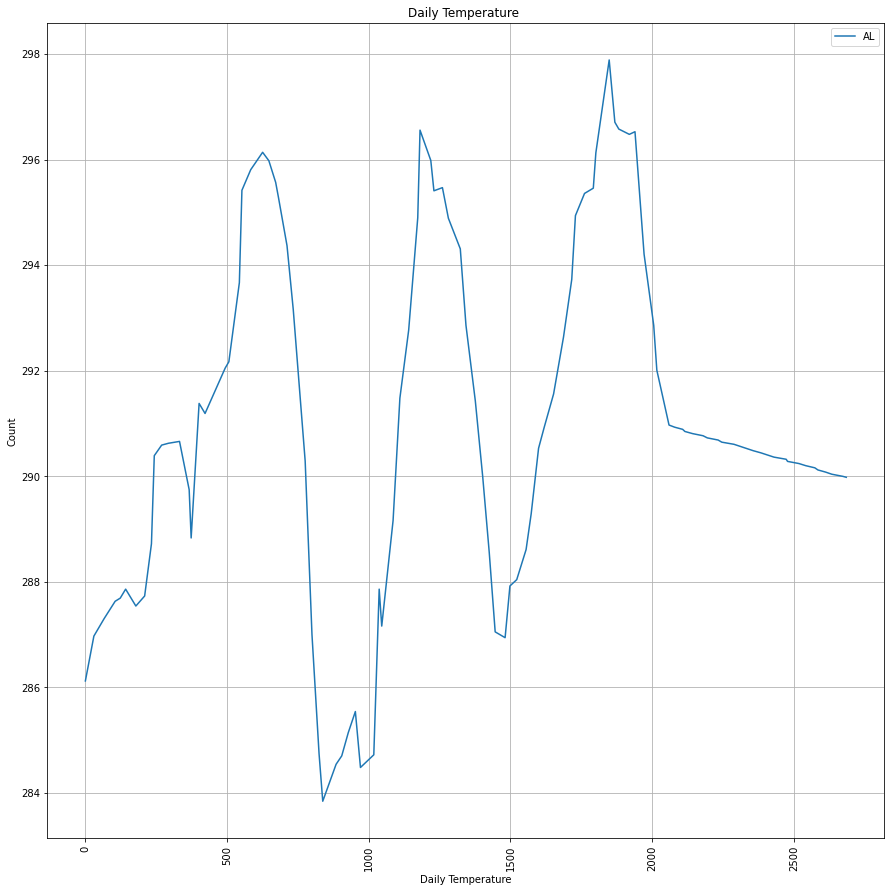

In [146]:
# Plot 3
# Creating line Chart for temperature change
# line Chart/Plot
plt.figure(figsize=(15,15))
plt.plot(df_file_web_api_steached[df_file_web_api_steached["state"] == "IL"]["temperature"])

#plt.grid(True)
plt.title("Daily Temperature ")
plt.ylabel("Count")
plt.xlabel("Daily Temperature")
plt.xticks(rotation='vertical')
plt.grid()
plt.legend(labels = StateShortdf["StateShortName"])
plt.savefig("tempratureChart.pdf")
plt.show()



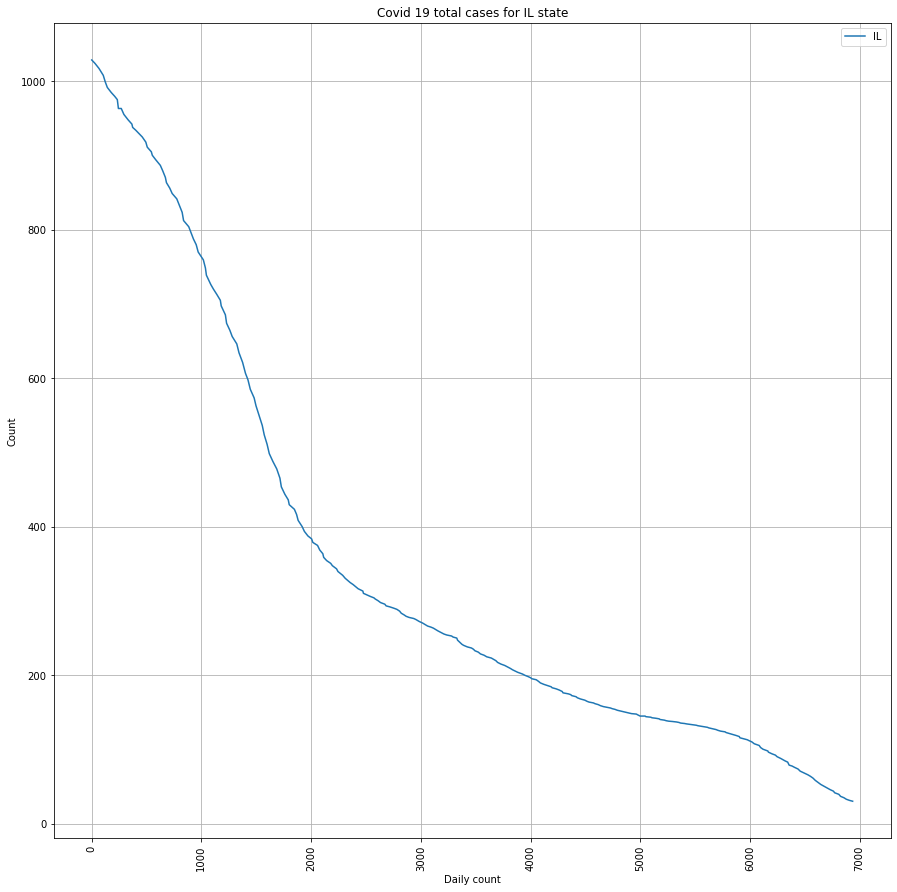

In [143]:
#Plot 4
# Plot the COVID 19 cases only for IL 

plt.figure(figsize=(15,15))
plt.plot(df_file_web_api_steached[df_file_web_api_steached["state"] == "IL"]["total_cases"]/1000)
#plt.grid(True)
plt.title("Covid 19 total cases for IL state")
plt.ylabel("Count")
plt.xlabel("Daily count")
plt.xticks(rotation='vertical')
plt.grid()
plt.legend(labels = {"IL"})
plt.savefig("IllinoiseLineChart.pdf")
plt.show()

# Summary

Everyone in this class is working really hard on final project submission. To make this project successful, we gone through multiple phases and number of exercises. 
I really enjoyed this subject and all assignments. 

Final project took it little long and continues improvements. I have chosen to use three datasets.
CSV files from kaggle
Load html table data from wiki using BeautifulSoup library 
OpenWeather API Data 

I have completed all the Milestone 1,2,3 with final submission and it has all the required plot in the assignment. 
I have re-upload all the milestone assignment as part of final submission. 

The most challenging part in this course (Final project) is combine all the data in one dataset. It really took me long time. I supposed to submit this assignment by midnight but took extra four hours to make it presentable. 

Stitching of data from multiple sources is easy with SQL light for COVID19 and COVID19_WEB data. To stitch the temperature data with Time series really took a long time instead of using SQL queries approach, I used pandas to manipulate the data to stitch it and save it back to SQL.

Thanks to Catherine for all the hard work of putting sach a wonderful course with all valuable information, all assignments. Thanks to all my colleagues for your reviews and all feedbacks you provided. I really enjoyed this class. Hope we can meet in next classes and get more and more knowledge on data science. 